# introduction

This dataset collects information from 100k medical appointments in Brazil and characteristics of each patient in terms of the type of disease and whether the patient attended on the appointment or not and we will analyze them to extract the useful results

# Questions

1-how many  Alcoholism per gender/which gender is more Alcoholism?

which day has the highest and lowest rate of all diseases?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

In [2]:
df=pd.read_csv('noshowappointments_kaggle.csv')

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


function to print short summary of the dataframe

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

count the total number for missing data in each column

In [6]:
df.duplicated().sum()

0

count the total duplicated in each column

# Data Cleaning

In [7]:
#convert from object to datatime to make it more suitable
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

convert from object to datatime to make it more suitable

In [8]:
#convert datetime to format 'Y-m-d'
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'].dt.strftime('%Y-%m-%d'))

convert datetime to format 'Y-m-d'

In [9]:
df['AppointmentDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

show result converting to column AppointmentDay

# Exploratory Data Analysis

how many Alcoholism per gender/which gender is more Alcoholism?

Gender
F    1223
M    2137
Name: Alcoholism, dtype: int64

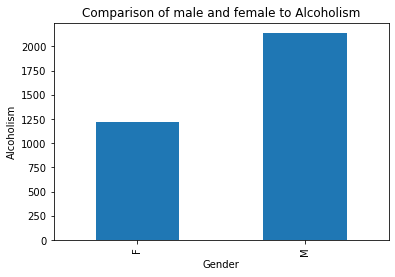

In [10]:
#used function groupby to gender column for find the differences between female and male by Alcoholism

df1=df.groupby('Gender')['Alcoholism'].sum()
df1.plot(kind='bar',title='Comparison of male and female to Alcoholism');
plt.xlabel('Gender')
plt.ylabel('Alcoholism')
df1

number of male is 2137 and number of female is 1223

which day has the highest and lowest rate of all diseases?

In [13]:

dis_df=df.groupby('AppointmentDay',as_index=False)['Hipertension','Diabetes','Alcoholism'].mean().head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7336\2401021837.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dis_df=df.groupby('AppointmentDay',as_index=False)['Hipertension','Diabetes','Alcoholism'].mean().head(5)


used mean for disease with groupby for AppointmentDay coulmn to calculate ratio disease according to the Appointment

In [14]:
 dis_df

,AppointmentDay,Hipertension,Diabetes,Alcoholism
0,2016-04-29,0.190726,0.074498,0.031839
1,2016-05-02,0.207267,0.073583,0.031764
2,2016-05-03,0.208882,0.074013,0.030075
3,2016-05-04,0.202255,0.065499,0.028311
4,2016-05-05,0.204306,0.071144,0.028317


show result variable dis_df

In [15]:
#to make visualizations more clear
dis_df['AppointmentDay']=dis_df['AppointmentDay'].astype(str)

to make visualizations more clear

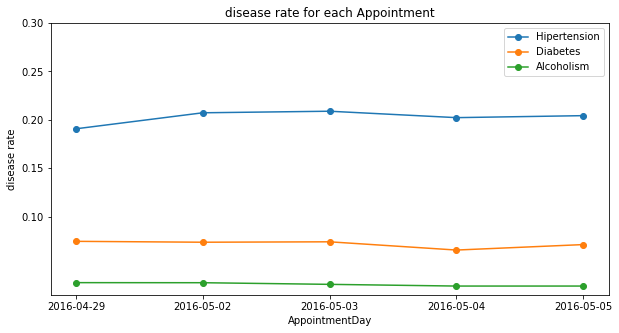

In [16]:
#used plot to explore variables
plt.figure(figsize=(10,5))
plt.plot(dis_df['AppointmentDay'],dis_df['Hipertension'],marker='o');
plt.plot(dis_df['AppointmentDay'],dis_df['Diabetes'],marker='o');
plt.plot(dis_df['AppointmentDay'],dis_df['Alcoholism'],marker='o');

plt.yticks([0.1,0.15,0.2,0.25,0.3])
plt.title('disease rate for each Appointment')
plt.xlabel('AppointmentDay')
plt.ylabel('disease rate')
plt.legend(['Hipertension','Diabetes','Alcoholism'])

Alcoholism disease reached its highest case on day 29 rate 2% and its lowest case on day 4 rate 1% and it is nearly steady while Hipertension reached its highest case on 3 day rate 22% and lowest case on 29 day rate 18%, Diabetes disease reached its highest case in 2 day rate 7%, the Hipertension disease is highest oscillation





# Conclusions






to sum up,1-how many alcoholism per gender/which gender is more Alcoholism? number of male is 2137 and number of female is 1223 ,Also male is most Alcoholism .which day has the highest and lowest rate of all diseases? 
 the highest rate for the patients Hipertension  in 3 Appointment day and lowest rate  in 29 Appointment day , the highest rate for the patients Diabetes in 2 Appointment day and lowest rate in 4 day , the highest rate for the patients Alcoholism  in 29 day and lowest rate in 4 day.
 
limitations: 
low quality of data ,the quality of the data collection poor there some instance where adequate data is not available for proper analytics to be done


